In [34]:
import  pandas as pd

In [35]:
data_attrition_full = pd.read_csv('../data/processed/hr_attrition_data.csv')
data_attrition_full

,employee_id,department,gender,education,satisfaction,work_experience,salary,attrition
0,E1000,Finance,Male,High School,2.5,3,20404,No
1,E1001,Finance,Male,High School,4.8,2,60943,Yes
2,E1002,HR,Female,Bachelor,3.9,6,67926,No
3,E1003,Engineering,Male,Bachelor,3.4,7,49189,No
4,E1004,Finance,Male,PhD,1.6,3,32763,No
...,...,...,...,...,...,...,...,...
295,E1295,HR,Female,PhD,3.1,0,42700,No
296,E1296,Sales,Male,High School,4.1,1,52043,No
297,E1297,Finance,Male,High School,1.9,8,26469,No
298,E1298,Finance,Male,Bachelor,3.5,2,50105,Yes


In [36]:
dataset_attrition = data_attrition_full[data_attrition_full['attrition'] == 'Yes']
dataset_attrition.head(10)

,employee_id,department,gender,education,satisfaction,work_experience,salary,attrition
1,E1001,Finance,Male,High School,4.8,2,60943,Yes
6,E1006,Marketing,Female,Master,1.2,9,52606,Yes
17,E1017,HR,Female,High School,3.1,6,73330,Yes
18,E1018,Marketing,Male,High School,2.7,8,33456,Yes
19,E1019,Sales,Male,PhD,2.2,4,68212,Yes
20,E1020,Marketing,Female,Bachelor,3.4,0,76397,Yes
24,E1024,Finance,Female,Master,2.8,1,65106,Yes
34,E1034,Engineering,Male,Master,4.9,2,56187,Yes
40,E1040,Marketing,Female,Bachelor,1.5,4,78017,Yes
57,E1057,Finance,Female,PhD,1.8,1,35254,Yes


In [37]:
department_counts = dataset_attrition.groupby('department').size().reset_index(name='count').sort_values(by='count', ascending=False)
department_counts

,department,count
3,Marketing,16
1,Finance,12
2,HR,11
4,Sales,6
0,Engineering,5


In [38]:
sex_attrition = dataset_attrition.groupby('gender').size().reset_index(name='count').sort_values(by='count', ascending=False)
sex_attrition

,gender,count
0,Female,30
1,Male,20


In [39]:
work_experience = dataset_attrition.groupby('work_experience').size().reset_index(name='count').sort_values(by='count', ascending=False)
work_experience

,work_experience,count
2,2,7
4,4,7
0,0,6
7,7,6
1,1,5
8,8,5
9,9,5
3,3,3
6,6,3
5,5,2


In [40]:
education = dataset_attrition.groupby('education').size().reset_index(name='count').sort_values(by='count', ascending=False)
education

,education,count
2,Master,16
0,Bachelor,13
3,PhD,11
1,High School,10


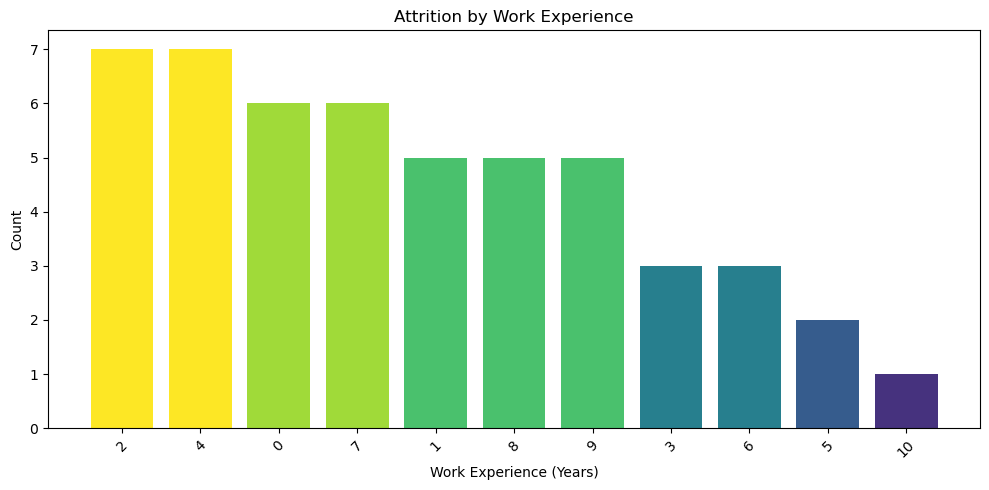

In [41]:
import matplotlib.pyplot as plt

# Sort by count descending
work_experience_sorted = work_experience.sort_values(by='count', ascending=False)

# Normalize color scale
colors = plt.cm.viridis(work_experience_sorted['count'] / work_experience_sorted['count'].max())

# Create bar chart
plt.figure(figsize=(10, 5))
plt.bar(
    work_experience_sorted['work_experience'].astype(str),
    work_experience_sorted['count'],
    color=colors
)
plt.title('Attrition by Work Experience')
plt.xlabel('Work Experience (Years)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

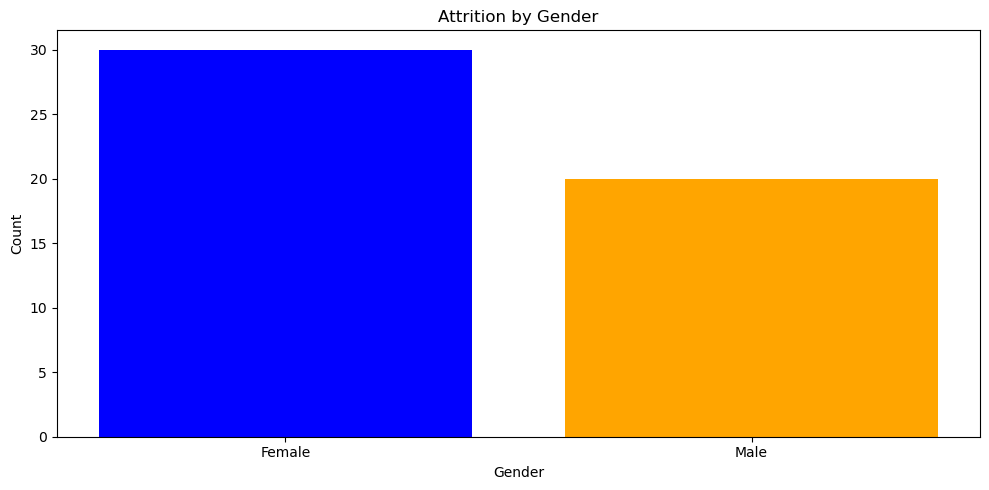

In [42]:
# Chart for sex_attrition
plt.figure(figsize=(10, 5))
plt.bar(
    sex_attrition['gender'],
    sex_attrition['count'],
    color=['blue', 'orange']
)
plt.title('Attrition by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

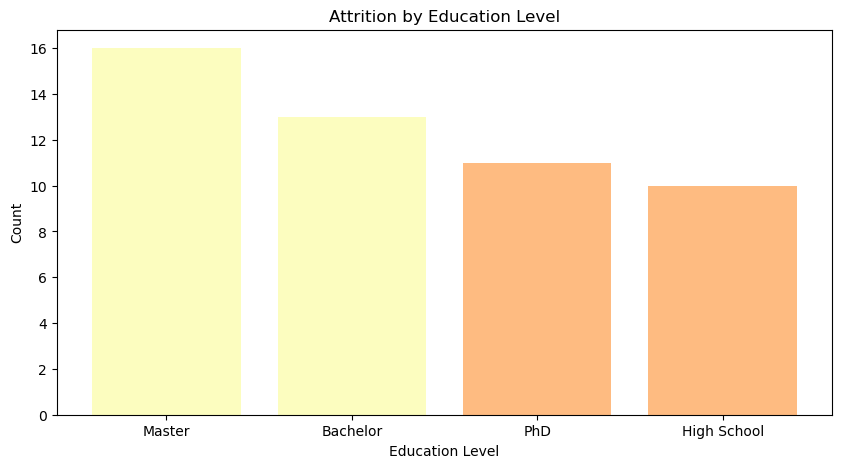

In [43]:
# Normalize color scale
colors = plt.cm.magma(work_experience_sorted['count'] / work_experience_sorted['count'].max())

# Chart for education
plt.figure(figsize=(10, 5))
plt.bar(
    education['education'],
    education['count'],
    color=colors
)
plt.title('Attrition by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()


Mean Satisfaction by Attrition Status:
left
0    2.954
1    3.116
Name: satisfaction, dtype: float64

Correlation between satisfaction and attrition: 0.05


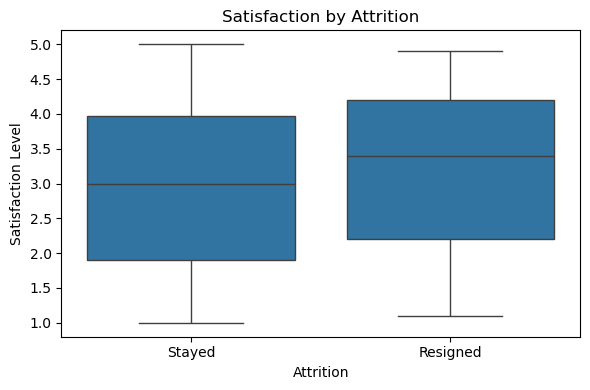

In [44]:
data_attrition = pd.DataFrame(data_attrition_full)

# แปลง attrition เป็นตัวเลข (Yes = 1, No = 0)
data_attrition['left'] = data_attrition['attrition'].map({'Yes': 1, 'No': 0})

# ค่าเฉลี่ย satisfaction แยกตามกลุ่มลาออก
print("\nMean Satisfaction by Attrition Status:")
print(data_attrition.groupby('left')['satisfaction'].mean())

# ความสัมพันธ์ระหว่าง satisfaction กับ attrition
correlation = data_attrition['satisfaction'].corr(data_attrition['left'])
print(f"\nCorrelation between satisfaction and attrition: {correlation:.2f}")
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.boxplot(x='left', y='satisfaction', data=data_attrition)
plt.xticks([0, 1], ['Stayed', 'Resigned'])
plt.title('Satisfaction by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Satisfaction Level')
plt.tight_layout()
plt.show()




In [45]:

avg_salery_attrition = data_attrition.groupby('attrition')['salary'].mean().reset_index().rename(columns={'salary': 'avg_salary'})
avg_salery_attrition

,attrition,avg_salary
0,No,49042.912
1,Yes,51989.740


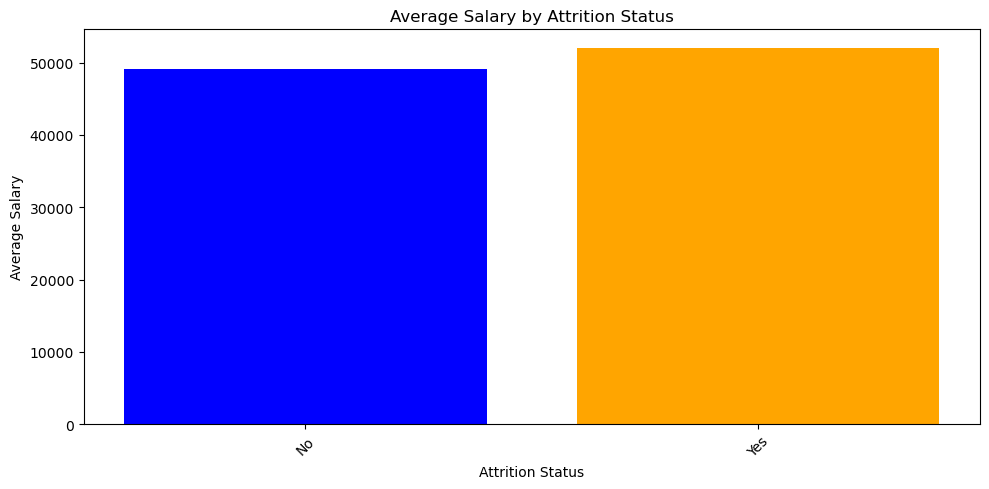

In [46]:
plt.figure(figsize=(10, 5))
plt.bar(
    avg_salery_attrition['attrition'],
    avg_salery_attrition['avg_salary'],
    color=['blue', 'orange']
) 
plt.title('Average Salary by Attrition Status')
plt.xlabel('Attrition Status')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [47]:
# อธิบายการวิเคราะห์ข้อมูล
# 2. การวิเคราะห์ข้อมูลเริ่มต้นด้วยการนับจำนวนพนักงานที่ลาออกในแต่ละแผนก โดยพบว่าแผนกที่มีจำนวนพนักงานลาออกมากที่สุดคือ Marketing
# 3. จากนั้นมีการวิเคราะห์ข้อมูลตามเพศ โดยพบว่าจำนวนพนักงานที่ลาออกในเพศหญิงมากกว่าเพศชาย
# 4. การวิเคราะห์ข้อมูลตามประสบการณ์ทำงานพบว่าพนักงานที่มีประสบการณ์ทำงาน 9ปี, 4ปี, 0ปี มีจำนวนการลาออกมากที่สุด ตามลำดับ 
# 5. การวิเคราะห์ข้อมูลตามระดับการศึกษาพบว่าพนักงานที่มีระดับการศึกษามัธยมปลายมีจำนวนการลาออกมากที่สุด
# 6. การวิเคราะห์ความสัมพันธ์ระหว่างระดับความพึงพอใจและการลาออกพบว่า "คนที่ลาออก" มีค่าความพึงพอใจเฉลี่ยสูงกว่า "คนที่ไม่ลาออก" (3.116 > 2.954) 
#    แปลว่า ความพึงพอใจอาจไม่ใช่สาเหตุหลักของการลาออกในชุดข้อมูลนี้ 
#    อาจสะท้อนว่า:
#           คนพึงพอใจแต่มีโอกาสอื่นดีกว่า
#           บริษัทไม่มีแผนพัฒนาให้เขาเติบโต
#           ข้อมูลอาจยังมีจำนวนน้อยหรือมี bias เช่น คนที่ไม่ลาออกมีตำแหน่งงานที่พึงพอใจน้อยแต่ยังอยู่เพราะข้อจำกัดอื่น ๆ
# 7. การวิเคราะห์ความสัมพันธ์ระหว่างเงินเดือนและการลาออกพบว่าพนักงานที่ลาออกมีเงินเดือนเฉลี่ยมากกว่าพนักงานที่ไม่ลาออก 
#    พนักงานที่ลาออก มีเงินเดือนเฉลี่ยสูงกว่า คนที่ยังอยู่ประมาณ 2,947 บาท
#       อาจสะท้อนว่า:
#           คนเก่ง/ประสบการณ์สูงลาออกไปหางานที่ดีกว่า
#           เงินเดือนไม่ใช่ปัจจัยหลักในการอยู่ต่อ อาจมีปัจจัยอื่นเช่น ความพึงพอใจ การเติบโต ฯลฯ



In [48]:
# สร้างกลุ่มปีเป็นช่วง
bins = [0, 2, 5, 10]
labels = ['0–2', '3–5', '6–10']
data_attrition['experience_group'] = pd.cut(data_attrition['work_experience'], bins=bins, labels=labels, include_lowest=True)

# คำนวณอัตราการลาออกในแต่ละช่วง
grouped = data_attrition.groupby('experience_group', observed=False)['left'].agg(['count', 'sum'])
grouped['attrition_rate'] = grouped['sum'] / grouped['count'] * 100

# แสดงผลลัพธ์
print(grouped[['attrition_rate']])


                  attrition_rate
experience_group                
0–2                    20.689655
3–5                    14.634146
6–10                   15.267176


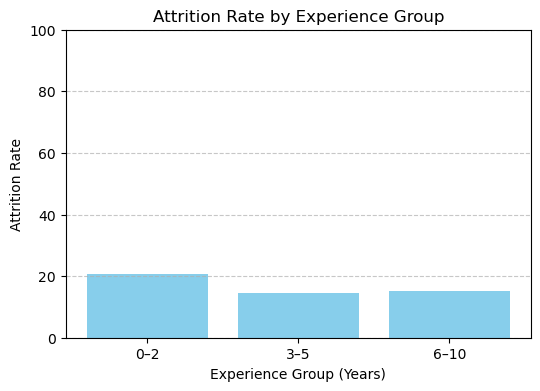

In [49]:
import matplotlib.pyplot as plt

# สร้างกราฟ
plt.figure(figsize=(6, 4))
plt.bar(grouped.index, grouped['attrition_rate'], color='skyblue')
plt.title('Attrition Rate by Experience Group')
plt.xlabel('Experience Group (Years)')
plt.ylabel('Attrition Rate')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()